In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

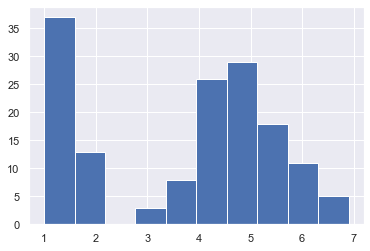

In [5]:
plt.hist(iris['petal_length'])

In [6]:
shortpetals = iris.loc[iris['petal_length'] <= 2.5]
shortpetals['species'].unique()

array(['setosa'], dtype=object)

In [7]:
longpetals = iris.loc[iris['petal_length'] >= 2.5]
longpetals['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

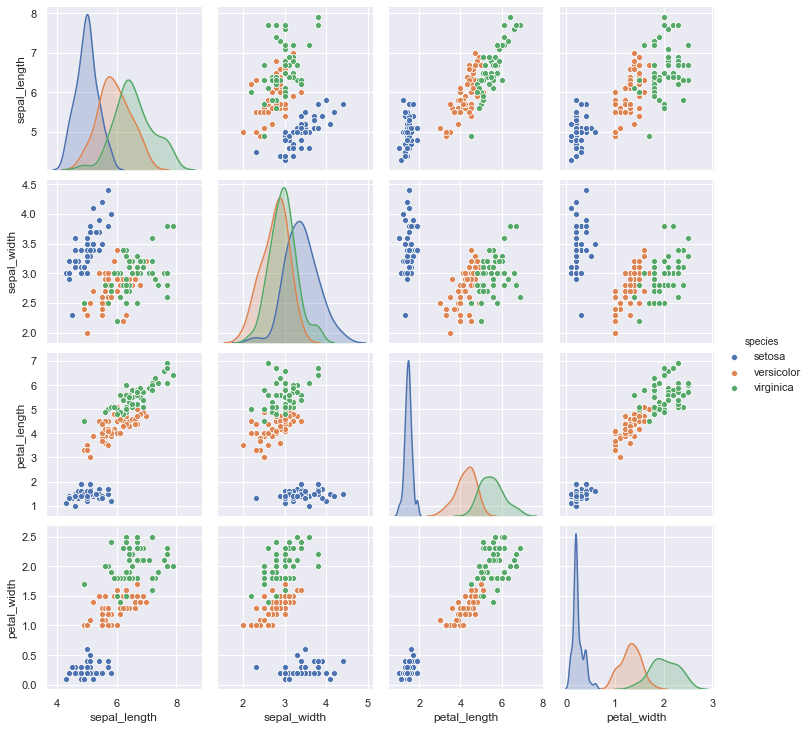

In [8]:
sns.pairplot(iris, hue='species')

C:\Users\scott\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


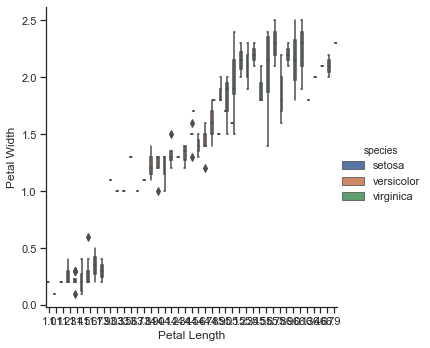

In [9]:
x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']
with sns.axes_style('ticks'):
    g = sns.factorplot('petal_length', 'petal_width', 'species', data = iris, kind = 'box')
    g.set_axis_labels('Petal Length', 'Petal Width')

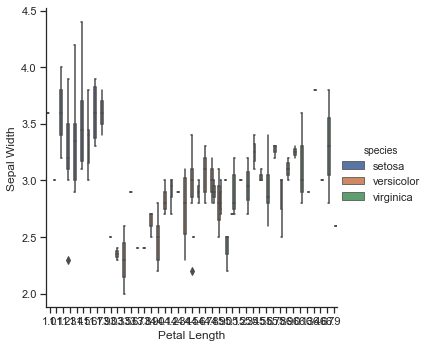

In [10]:
with sns.axes_style('ticks'):
    g = sns.catplot('petal_length', 'sepal_width', 'species', data = iris, kind = 'box')
    g.set_axis_labels('Petal Length', 'Sepal Width')

In [11]:
iris['plround'] = round(iris['petal_length'])
iris['pwround'] = round(iris['petal_width'])
iris['slround'] = round(iris['sepal_length'])
iris['swround'] = round(iris['sepal_width'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,plround,pwround,slround,swround
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,5.0,4.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,5.0,3.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,5.0,3.0
3,4.6,3.1,1.5,0.2,setosa,2.0,0.0,5.0,3.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,5.0,4.0


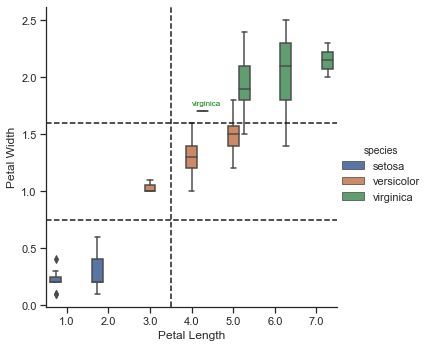

In [12]:
with sns.axes_style('ticks'):
    g = sns.catplot('plround', 'petal_width', 'species', data = iris, kind = 'box')
    g.set_axis_labels('Petal Length', 'Petal Width')
    plt.axvline(2.5, color = 'k', linestyle = '--')
    plt.axhline(0.75, color = 'k', linestyle = '--')
    plt.axhline(1.6, color = 'k', linestyle = '--')
    plt.text(3.0, 1.75, 'virginica', size = 8, color = 'green')

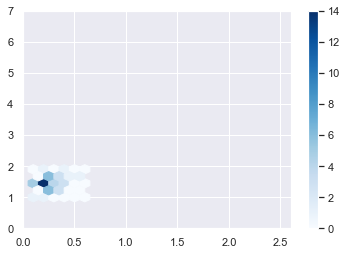

In [13]:
setosas = iris.loc[iris['species'] == 'setosa']
virginica = iris.loc[iris['species'] == 'virginica']
versicolor = iris.loc[iris['species'] == 'versicolor']

plt.hexbin(setosas['petal_width'], setosas['petal_length'], gridsize = 5, cmap='Blues')
plt.xlim(0, 2.6)
plt.ylim(0, 7)
plt.colorbar()

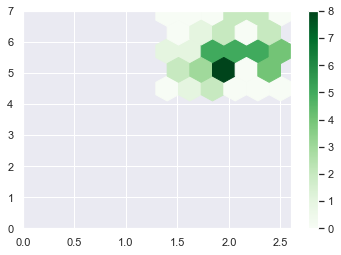

In [14]:
plt.hexbin(virginica['petal_width'], virginica['petal_length'], gridsize = 5, cmap='Greens')
plt.xlim(0, 2.6)
plt.ylim(0, 7)
plt.colorbar()

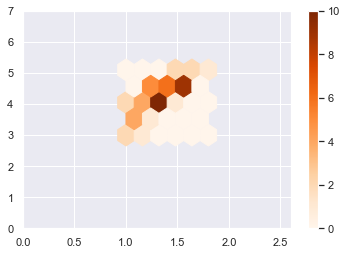

In [15]:
plt.hexbin(versicolor['petal_width'], versicolor['petal_length'], gridsize = 5, cmap='Oranges')
plt.xlim(0, 2.6)
plt.ylim(0, 7)
plt.colorbar()

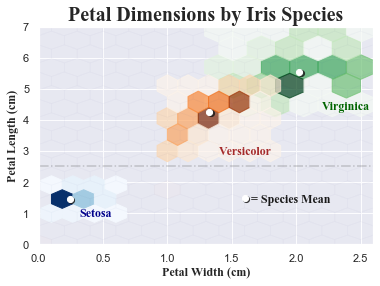

In [16]:
hfont = {'fontname':'Times New Roman'}
import matplotlib.patheffects as pe

plt.hexbin(setosas['petal_width'], setosas['petal_length'], gridsize = 3, cmap='Blues')
plt.hexbin(virginica['petal_width'], virginica['petal_length'], gridsize = 5, cmap='Greens', alpha = 0.7)
plt.hexbin(versicolor['petal_width'], versicolor['petal_length'], gridsize = 5, cmap='Oranges', alpha = 0.7)
plt.hexbin([0, 1, 2, 3], [0,2,5,7], gridsize = 15, cmap='coolwarm',alpha = 0.01)
plt.xlim(0, 2.6)
plt.ylim(0, 7)
plt.xlabel('Petal Width (cm)', **hfont)
plt.ylabel('Petal Length (cm)', **hfont)
plt.title('Petal Dimensions by Iris Species', size = 20, **hfont)
plt.text(0.32, 0.9, 'Setosa', size = 12, color = 'darkblue', **hfont)
plt.text(1.4, 2.9, 'Versicolor', size = 12, color = 'brown',**hfont)
plt.text(2.2, 4.35, 'Virginica', size = 12, color = 'darkgreen',**hfont)
plt.axhline(2.5, color = 'k', linestyle = '-.', alpha = 0.2)
ctry = np.array([1.464, 4.26, 5.552, 1.5])
ctry2 = ctry - 0.05
ctrx = np.array([0.244, 1.326, 2.026, 1.6])
ctrx2 = ctrx + 0.01
plt.text(1.65, 1.35, '= Species Mean', size = 12, color = 'k', **hfont)
plt.scatter(ctrx, ctry, s=150, color='w', marker = '.', zorder = 2)
plt.scatter(ctrx2, ctry2, s=150, color='k', marker = '.', alpha=0.8, zorder = 1)
plt.show()


In [17]:
print("Average Setosa:", setosas['petal_length'].mean(), 'cm long,', setosas['petal_width'].mean(), 'cm wide.')
print("Average Versicolor:", versicolor['petal_length'].mean(), 'cm long,', versicolor['petal_width'].mean(), 'cm wide.')
print("Average Virginica:", virginica['petal_length'].mean(), 'cm long,', virginica['petal_width'].mean(), 'cm wide.')

Average Setosa: 1.464 cm long, 0.2439999999999999 cm wide.
Average Versicolor: 4.26 cm long, 1.3259999999999998 cm wide.
Average Virginica: 5.552 cm long, 2.026 cm wide.


In [18]:
from mpl_toolkits import mplot3d

In [19]:
setosas['zaxisval'] = 1
versicolor['zaxisval'] = 2
virginica['zaxisval'] = 3
iris2 = pd.concat([setosas, versicolor, virginica])
iris2.tail()

C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,sepal_length,sepal_width,petal_length,petal_width,species,plround,pwround,slround,swround,zaxisval
145,6.7,3.0,5.2,2.3,virginica,5.0,2.0,7.0,3.0,3
146,6.3,2.5,5.0,1.9,virginica,5.0,2.0,6.0,2.0,3
147,6.5,3.0,5.2,2.0,virginica,5.0,2.0,6.0,3.0,3
148,6.2,3.4,5.4,2.3,virginica,5.0,2.0,6.0,3.0,3
149,5.9,3.0,5.1,1.8,virginica,5.0,2.0,6.0,3.0,3


In [20]:
import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","darkorange","green"])

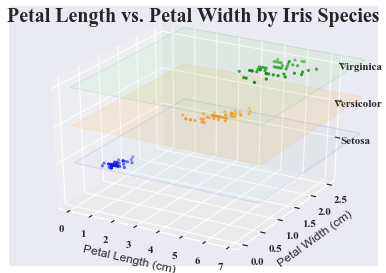

In [21]:
from matplotlib.patches import Rectangle, PathPatch
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d
X = iris2['petal_length']
y = iris2['petal_width']
z = iris2['zaxisval']

xs = X
ys = y
zs = z


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.set_zticks([1,2,3])
ax1.set_zticklabels(['Setosa','Versicolor','Virginica'])
p6 = Rectangle((0, 0), 8, 3, facecolor='lightblue', edgecolor='blue', label='Setosa', alpha=0.1)
ax1.add_patch(p6)
art3d.pathpatch_2d_to_3d(p6, z=1, zdir="z")
p7 = Rectangle((0, 0), 8, 3, facecolor='orange', edgecolor='darkorange', label='Versicolor', alpha=0.1)
ax1.add_patch(p7)
art3d.pathpatch_2d_to_3d(p7, z=2, zdir="z")
p8 = Rectangle((0, 0), 8, 3, facecolor='lightgreen', edgecolor='green', label='Virginica', alpha=0.1)
ax1.add_patch(p8)
art3d.pathpatch_2d_to_3d(p8, z=3, zdir="z")
ax1.scatter(xs, ys, zs, marker='.', c=z, cmap=cmap, depthshade=True)
ax1.set_xlabel("Petal Length (cm)")
ax1.set_ylabel("Petal Width (cm)")
ax1.set_title("Petal Length vs. Petal Width by Iris Species", size = 20, **hfont)
plt.tight_layout()
for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_zticklabels():
    tick.set_fontname("Times New Roman")


In [22]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.set_zticks([1,2,3])
#ax.set_zticklabels(['Setosa','Versicolor','Virginica'])
#p = Rectangle((0, 0), 8, 3, color='lightblue', label='Setosa', alpha=0.4)
#ax.add_patch(p)
#art3d.pathpatch_2d_to_3d(p, z=1, zdir="z")
#p2 = Rectangle((0, 0), 8, 3, color='orange', label='Versicolor', alpha=0.4)
#ax.add_patch(p2)
#art3d.pathpatch_2d_to_3d(p2, z=2, zdir="z")
#p3 = Rectangle((0, 0), 8, 3, color='lightgreen', label='Virginica', alpha=0.4)
#ax.add_patch(p3)
#art3d.pathpatch_2d_to_3d(p3, z=3, zdir="z")
#p4 = Rectangle((0, 0), 2.5, 3.5, facecolor='white', edgecolor='black', alpha=0.3)
#ax.add_patch(p4)
#art3d.pathpatch_2d_to_3d(p4, z=2.5, zdir="x")
#p5 = Rectangle((0, 0), 8, 3.5, facecolor='white', edgecolor='black', alpha=0.3)
#ax.add_patch(p5)
#art3d.pathpatch_2d_to_3d(p5, z=0.8, zdir="y")
#ax.scatter(xs, ys, zs, marker='.', c=z, cmap=cmap, depthshade=True)
#ax.set_xlabel("Petal Length (cm)")
#ax.set_ylabel("Petal Width (cm)")
#ax.set_title("Petal Length vs. Petal Width by Iris Species")
#plt.tight_layout()



In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,plround,pwround,slround,swround
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,5.0,4.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,5.0,3.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,5.0,3.0
3,4.6,3.1,1.5,0.2,setosa,2.0,0.0,5.0,3.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,5.0,4.0


In [24]:
iris['sepalratio'] = iris['sepal_length'] / iris['sepal_width']
iris['petalratio'] = iris['petal_length'] / iris['petal_width']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,plround,pwround,slround,swround,sepalratio,petalratio
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,5.0,4.0,1.457143,7.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,5.0,3.0,1.633333,7.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,5.0,3.0,1.468750,6.5
3,4.6,3.1,1.5,0.2,setosa,2.0,0.0,5.0,3.0,1.483871,7.5
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,5.0,4.0,1.388889,7.0


In [25]:
iris['sepalratio'].describe()

count    150.000000
mean       1.955144
std        0.398697
min        1.268293
25%        1.551915
50%        2.032292
75%        2.224910
max        2.961538
Name: sepalratio, dtype: float64

Text(0, 0.5, 'Frequency')

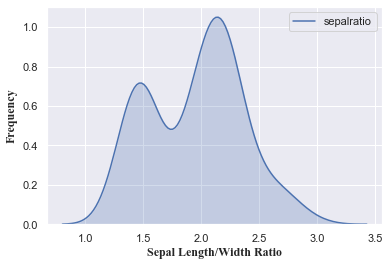

In [26]:
fig = plt.figure()
ax = plt.axes()
sns.kdeplot(iris['sepalratio'], shade=True)
ax.set_xlabel('Sepal Length/Width Ratio', **hfont)
ax.set_ylabel('Frequency', **hfont)

In [27]:
iris['petalratio'].describe()

count    150.000000
mean       4.367166
std        2.651508
min        2.125000
25%        2.802381
50%        3.300000
75%        4.666667
max       15.000000
Name: petalratio, dtype: float64

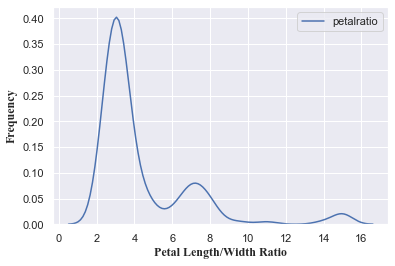

In [28]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('Petal Length/Width Ratio', **hfont)
ax.set_ylabel('Frequency', **hfont)
sns.kdeplot(iris['petalratio'])

In [29]:
setosas['sepalratio'] = setosas['sepal_length'] / setosas['sepal_width']
setosas.head()

C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sepal_length,sepal_width,petal_length,petal_width,species,plround,pwround,slround,swround,zaxisval,sepalratio
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,5.0,4.0,1,1.457143
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,5.0,3.0,1,1.633333
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,5.0,3.0,1,1.468750
3,4.6,3.1,1.5,0.2,setosa,2.0,0.0,5.0,3.0,1,1.483871
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,5.0,4.0,1,1.388889


In [30]:
versicolor['sepalratio'] = versicolor['sepal_length'] / versicolor['sepal_width']
versicolor.head()

C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sepal_length,sepal_width,petal_length,petal_width,species,plround,pwround,slround,swround,zaxisval,sepalratio
50,7.0,3.2,4.7,1.4,versicolor,5.0,1.0,7.0,3.0,2,2.187500
51,6.4,3.2,4.5,1.5,versicolor,4.0,2.0,6.0,3.0,2,2.000000
52,6.9,3.1,4.9,1.5,versicolor,5.0,2.0,7.0,3.0,2,2.225806
53,5.5,2.3,4.0,1.3,versicolor,4.0,1.0,6.0,2.0,2,2.391304
54,6.5,2.8,4.6,1.5,versicolor,5.0,2.0,6.0,3.0,2,2.321429


In [31]:
virginica['sepalratio'] = virginica['sepal_length'] / virginica['sepal_width']
virginica.head()

C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sepal_length,sepal_width,petal_length,petal_width,species,plround,pwround,slround,swround,zaxisval,sepalratio
100,6.3,3.3,6.0,2.5,virginica,6.0,2.0,6.0,3.0,3,1.909091
101,5.8,2.7,5.1,1.9,virginica,5.0,2.0,6.0,3.0,3,2.148148
102,7.1,3.0,5.9,2.1,virginica,6.0,2.0,7.0,3.0,3,2.366667
103,6.3,2.9,5.6,1.8,virginica,6.0,2.0,6.0,3.0,3,2.172414
104,6.5,3.0,5.8,2.2,virginica,6.0,2.0,6.0,3.0,3,2.166667


In [32]:
setosas['petalratio'] = setosas['petal_length'] / setosas['petal_width']
versicolor['petalratio'] = versicolor['petal_length'] / versicolor['petal_width']
virginica['petalratio'] = virginica['petal_length'] / virginica['petal_width']

setosas['splratio'] = setosas['petal_length']/setosas['sepal_length']
versicolor['splratio'] = versicolor['petal_length']/versicolor['sepal_length']
virginica['splratio'] = virginica['petal_length']/virginica['sepal_length']

setosas['ldiff'] = setosas['sepal_length'] - setosas['petal_length']
versicolor['ldiff'] = versicolor['sepal_length'] - versicolor['petal_length']
virginica['ldiff'] = virginica['sepal_length'] - virginica['petal_length']


C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Text(0.5, 0.98, 'KDEs of Petal and Sepal Length/Width Ratios')

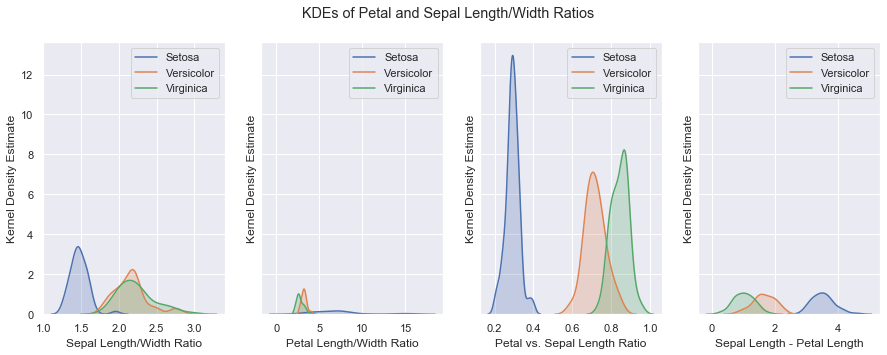

In [33]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True, figsize=(15,5))
sns.kdeplot(setosas['sepalratio'], shade=True, label = 'Setosa', ax=ax1)
sns.kdeplot(versicolor['sepalratio'], shade=True, label = 'Versicolor', ax=ax1)
sns.kdeplot(virginica['sepalratio'], shade=True, label = 'Virginica', ax=ax1)
ax1.set_xlabel('Sepal Length/Width Ratio')
ax1.set_ylabel('Kernel Density Estimate')

sns.kdeplot(setosas['petalratio'], shade=True, label = 'Setosa', ax=ax2)
sns.kdeplot(versicolor['petalratio'], shade=True, label = 'Versicolor', ax=ax2)
sns.kdeplot(virginica['petalratio'], shade=True, label = 'Virginica', ax=ax2)
ax2.set_xlabel('Petal Length/Width Ratio')
ax2.set_ylabel('Kernel Density Estimate')

sns.kdeplot(setosas['splratio'], shade=True, label='Setosa', ax=ax3)
sns.kdeplot(versicolor['splratio'], shade=True, label='Versicolor', ax=ax3)
sns.kdeplot(virginica['splratio'], shade=True, label='Virginica', ax=ax3)
ax3.set_xlabel('Petal vs. Sepal Length Ratio')
ax3.set_ylabel('Kernel Density Estimate')

sns.kdeplot(setosas['ldiff'], shade=True, label='Setosa', ax=ax4)
sns.kdeplot(versicolor['ldiff'], shade=True, label='Versicolor', ax=ax4)
sns.kdeplot(virginica['ldiff'], shade=True, label='Virginica', ax=ax4)
ax4.set_xlabel('Sepal Length - Petal Length')
ax4.set_ylabel('Kernel Density Estimate')

plt.suptitle('KDEs of Petal and Sepal Length/Width Ratios')

Versicolor and virginica are evidently more closely related to each other than to setosa. As such, they are nearly indistinguishible when using kernel density estimates of dimension relationships (i.e. length/width ratios of the petals and sepals respectively.) According to the third graph, petal vs. sepal length ratio strictly divides setosa from the other two species, and demonstrates a bit less overlap between versicolor and virginica. Thus, when building a model, this factor would be a strong choice (put plainly, how long the petal is compared to the sepal.)

In [34]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,plround,pwround,slround,swround,sepalratio,petalratio
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,5.0,4.0,1.457143,7.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,5.0,3.0,1.633333,7.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,5.0,3.0,1.468750,6.5
3,4.6,3.1,1.5,0.2,setosa,2.0,0.0,5.0,3.0,1.483871,7.5
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,5.0,4.0,1.388889,7.0


In [35]:
irises = pd.concat([setosas, versicolor, virginica])

In [36]:
irises.head()

,sepal_length,sepal_width,petal_length,petal_width,species,plround,pwround,slround,swround,zaxisval,sepalratio,petalratio,splratio,ldiff
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,5.0,4.0,1,1.457143,7.0,0.274510,3.7
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,5.0,3.0,1,1.633333,7.0,0.285714,3.5
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,5.0,3.0,1,1.468750,6.5,0.276596,3.4
3,4.6,3.1,1.5,0.2,setosa,2.0,0.0,5.0,3.0,1,1.483871,7.5,0.326087,3.1
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,5.0,4.0,1,1.388889,7.0,0.280000,3.6


In [37]:
irises['spwratio'] = irises['petal_width']/irises['sepal_width']
irisesc = irises.copy()
ir = irisesc[['sepalratio', 'petalratio', 'splratio', 'sepal_length','sepal_width','petal_width','spwratio','species']]
ir.head()

,sepalratio,petalratio,splratio,sepal_length,sepal_width,petal_width,spwratio,species
0,1.457143,7.0,0.274510,5.1,3.5,0.2,0.057143,setosa
1,1.633333,7.0,0.285714,4.9,3.0,0.2,0.066667,setosa
2,1.468750,6.5,0.276596,4.7,3.2,0.2,0.062500,setosa
3,1.483871,7.5,0.326087,4.6,3.1,0.2,0.064516,setosa
4,1.388889,7.0,0.280000,5.0,3.6,0.2,0.055556,setosa


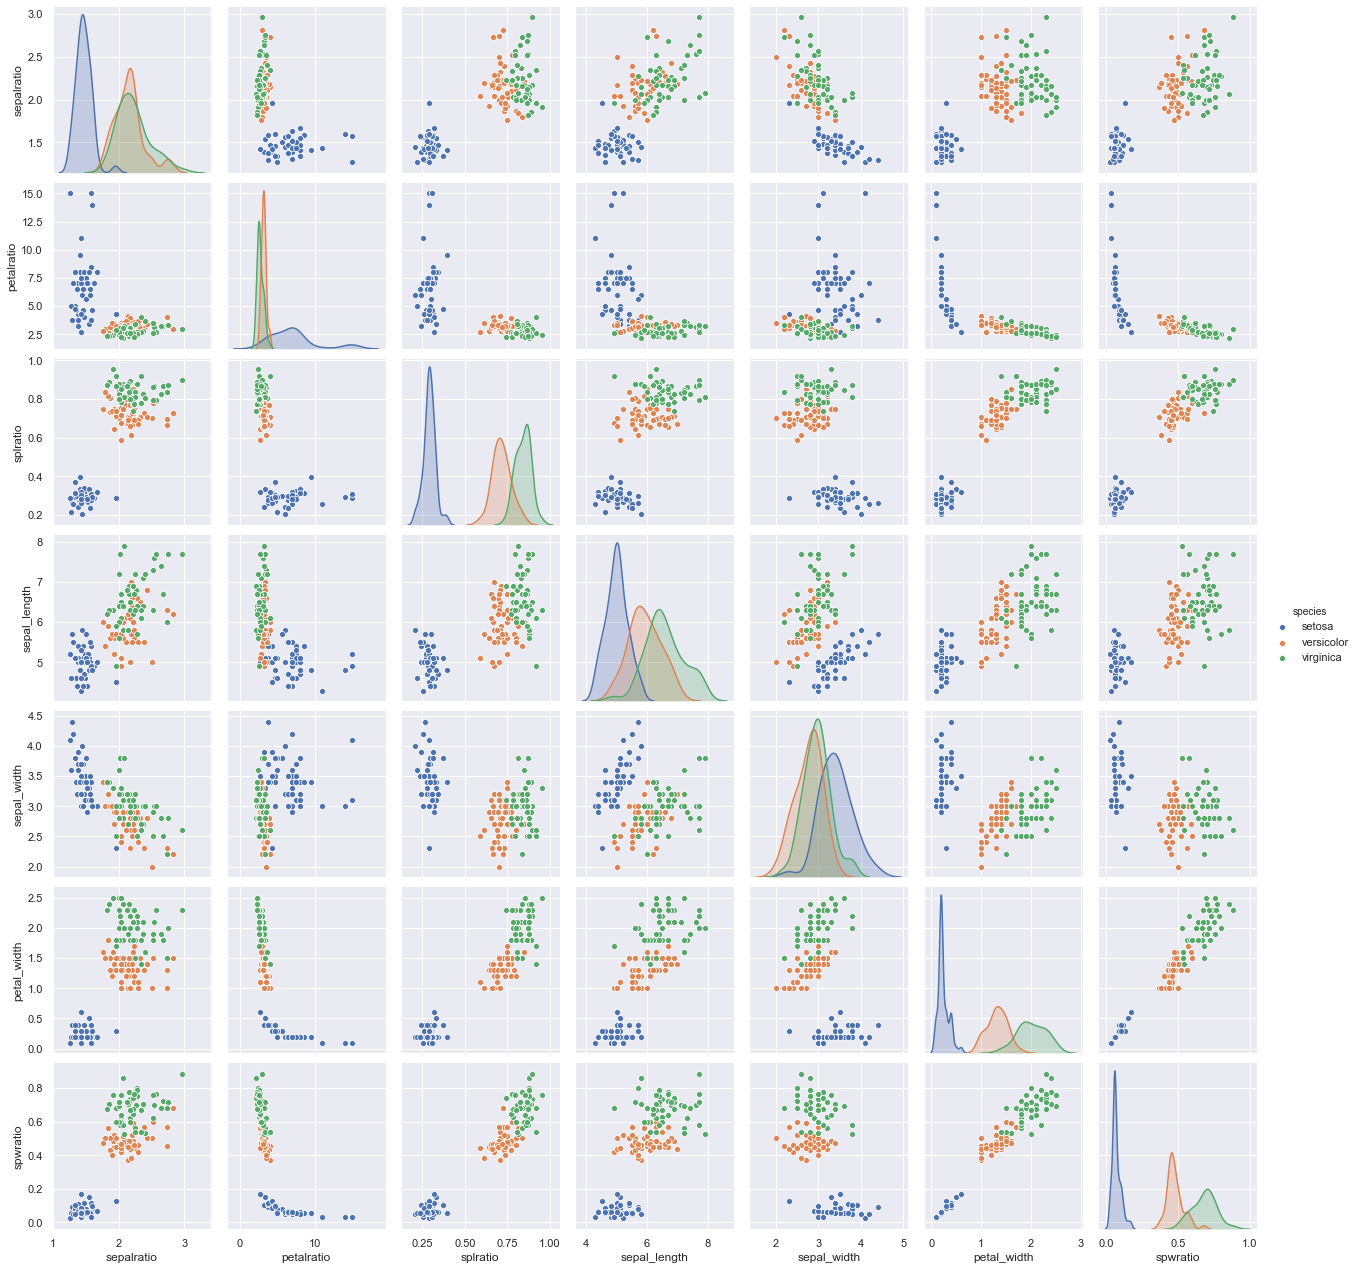

In [38]:
sns.pairplot(ir, hue = 'species')

To my eye, the most effect separation of datapoints occurs when comparing splratio (petal to sepal length) and petal_width (petal width). I think perhaps given these two observations, you could predict with a pretty high level of confidence the species of the iris. As in the 3-dimensional plot above, it's obvious that petal length and width are both required to make a quality prediction. You could imagine particular length to width ratios as different petal shapes -- put this way it becomes somewhat obvious.  

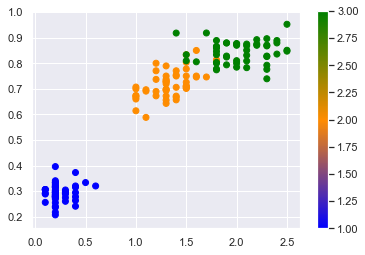

In [39]:
plt.scatter(ir['petal_width'], ir['splratio'], c=z, cmap=cmap)
plt.colorbar()

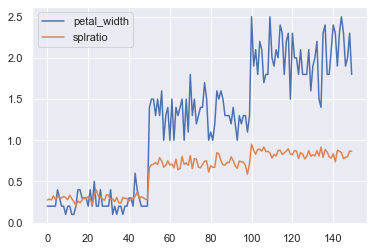

In [40]:
line = ir[['petal_width','splratio']]
line.plot(kind='line')

In [41]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = ir['petal_width'].values.reshape(-1,1)
y = ir['splratio'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg = LinearRegression()
reg.fit(X_train, y_train)

#To retrieve the intercept:
print(reg.intercept_)
#For retrieving the slope:
print(reg.coef_)

[0.26218021]
[[0.29345161]]


In [42]:
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.879310,0.966464
1,0.666667,0.555632
2,0.254545,0.320871
3,0.863014,0.790393
4,0.300000,0.320871
5,0.952381,0.995809
6,0.260000,0.350216
7,0.701493,0.702358
8,0.705882,0.673012
9,0.655738,0.643667


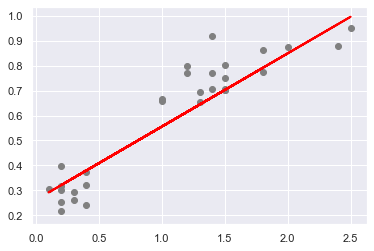

In [43]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


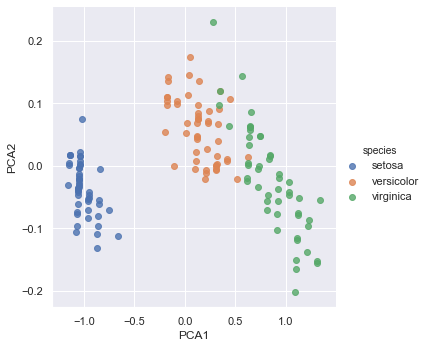

In [44]:
from sklearn.decomposition import PCA
X = ir[['splratio','petal_width']]

model = PCA(n_components=2)
model.fit(X)
X_2D = model.transform(X)

ir['PCA1'] = X_2D[:,0]
ir['PCA2'] = X_2D[:,1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=ir, fit_reg=False)

In [53]:
from sklearn.mixture import GaussianMixture
model2 = GaussianMixture(n_components = 3, covariance_type='full')
model2.fit(X)
y_gmm = model2.predict(X)
X['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=X, hue='species', col = 'cluster', fit_reg=False)



C:\Users\scott\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


KeyError: "['PCA1', 'species', 'PCA2'] not in index"

In [49]:
X

,splratio,petal_width
0,0.274510,0.2
1,0.285714,0.2
2,0.276596,0.2
3,0.326087,0.2
4,0.280000,0.2
...,...,...
145,0.776119,2.3
146,0.793651,1.9
147,0.800000,2.0
148,0.870968,2.3


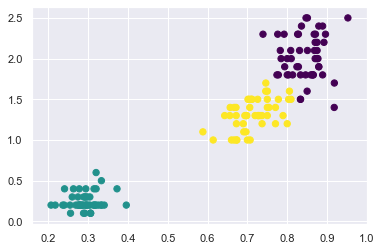

In [54]:
species = model2.predict(X)
ratio = np.array(X_train['splratio'])
width = np.array(X_train['petal_width'])
#PCA1 vs PCA2, color is the predicted category
plt.scatter(ratio, width, c=y_gmm, s=40, cmap='viridis')

In [55]:
probs = model2.predict_proba(X)
print(probs[95:105].round(3))
size = 50 * probs.max(1) ** 2

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [56]:
plt.style.use('fivethirtyeight')
plt.scatter(x0, x1, c=y_gmm, cmap='Dark2', s=size)

NameError: name 'x0' is not defined

In [57]:
import pickle
filename = 'irisgmm.sav'
pickle.dump(model2, open(filename, 'wb'))

In [58]:
Xnew = [[2, 0.8]]
ynew = model2.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

ValueError: Expected the input data X have 3 features, but got 2 features

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
x0 = np.array(X['splratio'])
x1 = np.array(X['petal_width'])

In [ ]:
plt.scatter(x0, x1, c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
filename2 = 'iriskmeans.sav'
pickle.dump(kmeans, open(filename2, 'wb'))

In [ ]:
import string
tryAgain = 'yes'
def speciespredict():
    rat = input("Petal to Sepal Length Ratio:")
    wid = input("Petal Width (cm):")
    Xnew = [[rat, wid]]
    ynew = kmeans.predict(Xnew)
    if ynew == 0:
        print("Setosa")
    elif ynew == 1:
        print("Versicolor")
    elif ynew == 2:
        print("Virginica")
    inp = input("Enter 'yes' to try again, or anything else to exit: ")
    if inp.lower() != 'yes':
        exit()

In [ ]:
while tryAgain == 'yes':
    speciespredict()

In [ ]:
#well fuck me. was working great right up until the function definition, which wouldn't run. then i reloaded the kernel, which ruined a lot of the code. need to be more careful next time